In [9]:
import numpy as np
import matplotlib.pyplot as plt
from extract_dynamical_systems import least_squares_minimization
from extract_dynamical_systems import finite_difference
from extract_dynamical_systems import right_hand_side
from extract_dynamical_systems import solve_linear_system
from extract_dynamical_systems import solve_linear_system_full_data
from sklearn.metrics import mean_squared_error

# Task 2/5: Approximating linear vector fields

## Load Data Sets

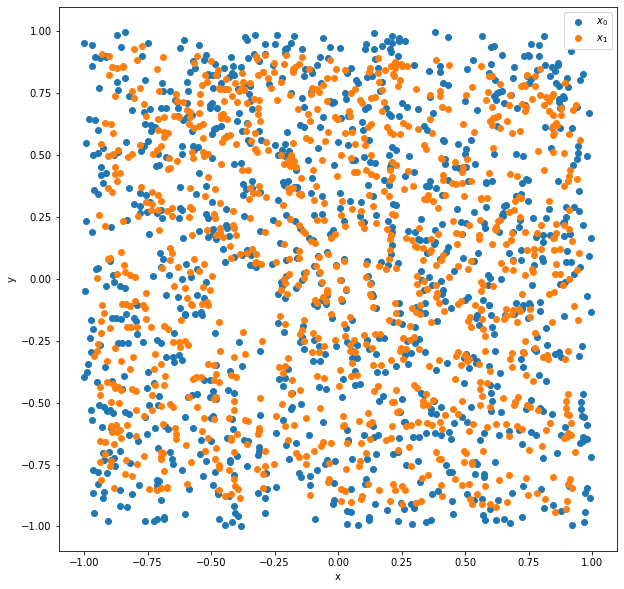

In [10]:
#load the data sets and plot both in one plot to see the difference between both timesteps
x0 = np.loadtxt('task2/linear_vectorfield_data_x0.txt')
x1 = np.loadtxt('task2/linear_vectorfield_data_x1.txt')

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(x0[:,0], x0[:,1], label='$x_0$')
ax.scatter(x1[:,0], x1[:,1], label='$x_1$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.savefig("task2/figures/task2_datasets")

## Calculate $\Delta_t$

In [11]:
#calculate the delta_t which minimizes the mean squared error of part two (manual tests have shown it is between 0.08 and 0.12)
delta_t_min = 1.0
mse_min = 1.0
for delta_t in np.arange(0.08, 0.12, 0.001):
    #approximate vector field v_hat via difference formula of x_0 and x_1 using delta_t
    v_hat = finite_difference(x0, x1, delta_t)
    #approximate the matrix A_hat
    A_hat = least_squares_minimization(x0, v_hat, rcond=None)
    #solve linear system up to t_end = 0.1 to obatain x1_hat
    x1_hat = solve_linear_system(A=A_hat, start_points=x0, t_0=0.0, t_end=0.1, resolution=1000)
    #compute mean squared error and check if it is smaller
    mse = mean_squared_error(x1, x1_hat)
    if mse < mse_min:
        mse_min = mse
        delta_t_min = delta_t
    else:
        break

print(f"A value of around {delta_t_min:.3} for Delta_t minimizes the Mean Squared Error of part two (MSE = {mse_min}).")

A value of around 0.096 for Delta_t minimizes the Mean Squared Error of part two (MSE = 8.239060217309535e-07).


## Part One

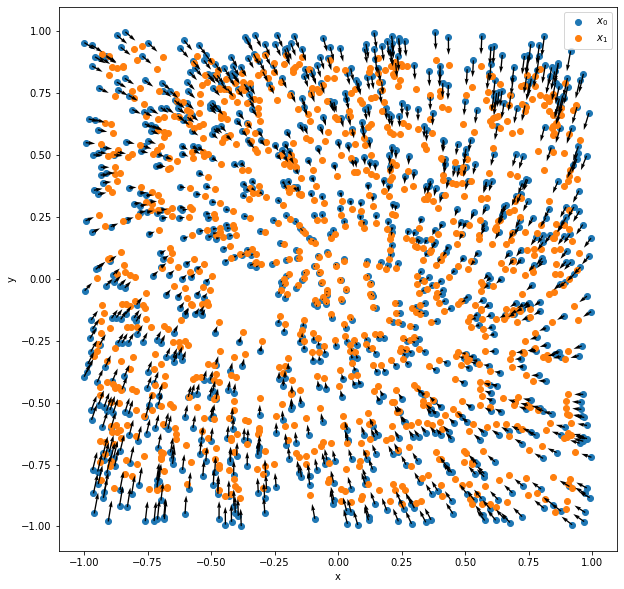

In [12]:
#approximate vector field v_hat via difference formula of x_0 and x_1 using the found delta_t which minimizes the MSE
v_hat = finite_difference(x0, x1, delta_t_min)

#plot approximated vector field
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(x0[:,0], x0[:,1], label='$x_0$')
ax.scatter(x1[:,0], x1[:,1], label='$x_1$')
ax.quiver(x0[:,0], x0[:,1], v_hat[:,0], v_hat[:,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
fig.savefig("task2/figures/task2_vector_approx")

#approximate the matrix A_hat
A_hat = least_squares_minimization(x0, v_hat, rcond=None)

## Part Two

In [13]:
#solve linear system up to t_end = 0.1 to obatain x1_hat
x1_hat = solve_linear_system(A=A_hat, start_points=x0, t_0=0.0, t_end=0.1, resolution=1000)

#compute mean squared error
mse = mean_squared_error(x1, x1_hat)
print(f"The mean squared error is {mse_min}.")

The mean squared error is 8.239060217309535e-07.


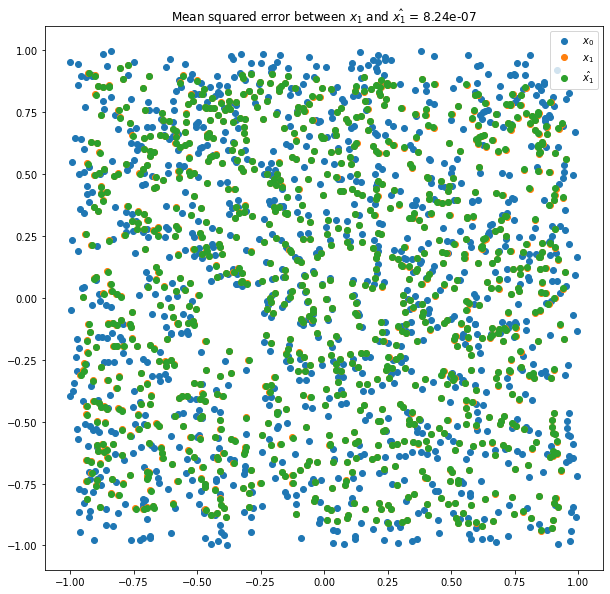

In [14]:
#approximate vector field v_hat via difference formula of x_0 and x_1 using delta_t
v_hat = finite_difference(x0, x1, delta_t_min)
#approximate the matrix A_hat
A_hat = least_squares_minimization(x0, v_hat, rcond=None)
#solve linear system up to t_end = 0.1 to obatain x1_hat
x1_hat = solve_linear_system(A=A_hat, start_points=x0, t_0=0.0, t_end=0.1, resolution=1000)
#calculate mean squared error
mse = mean_squared_error(x1, x1_hat)
#plot old and approximated data
fig = plt.figure(figsize=(10,10))
plt.title(r"Mean squared error between $x_1$ and $\hat{x_1}$ = " + f"{mse:.3}")
plt.scatter(x0[:, 0], x0[:, 1], label='$x_0$')
plt.scatter(x1[:, 0], x1[:, 1], label='$x_1$')
plt.scatter(x1_hat[:, 0], x1_hat[:, 1], label='$\hat{x_1}$')
plt.legend(loc="upper right")
plt.savefig("task2/figures/task2_x1_hat")

## Showcase different $\Delta_t$

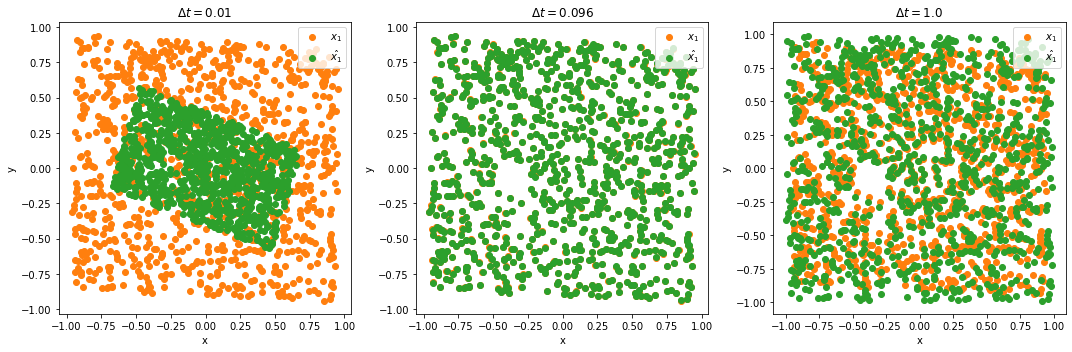

In [15]:
#plot approximated x1_hat for different values of delta_t including the found best one
delta_ts = [0.01, delta_t_min, 1.0]
fig, ax = plt.subplots(1,len(delta_ts), figsize=(len(delta_ts) * 5, 5))

for i, delta_t in enumerate(delta_ts):
    #approximate vector field v_hat via difference formula of x_0 and x_1 using the found delta_t
    v_hat = finite_difference(x0, x1, delta_t)
    #approximate the matrix A_hat
    A_hat = least_squares_minimization(x0, v_hat, rcond=None)
    #solve linear system up to t_end = 0.1 to obatain x1_hat
    x1_hat = solve_linear_system(A=A_hat, start_points=x0, t_0=0.0, t_end=0.1, resolution=1000)
    ax[i].scatter(x1[:,0], x1[:,1], label='$x_1$', c='tab:orange')
    ax[i].scatter(x1_hat[:,0], x1_hat[:,1], label='$\hat{x_1}$', c='tab:green')
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].legend(loc='upper right')
    ax[i].set_title("$\Delta t = $" + f"{delta_t:.3}")
plt.tight_layout()
plt.savefig("task2/figures/task2_x1_hat_for_different_delta_t")

## Part three

In [16]:
#solve linear system up to t_end = 100 for initial point [10, 10]
initial_point = [10, 10]
traj = solve_linear_system_full_data(A=A_hat, start_point=initial_point, t_0=0.0, t_end=100, resolution=1000)

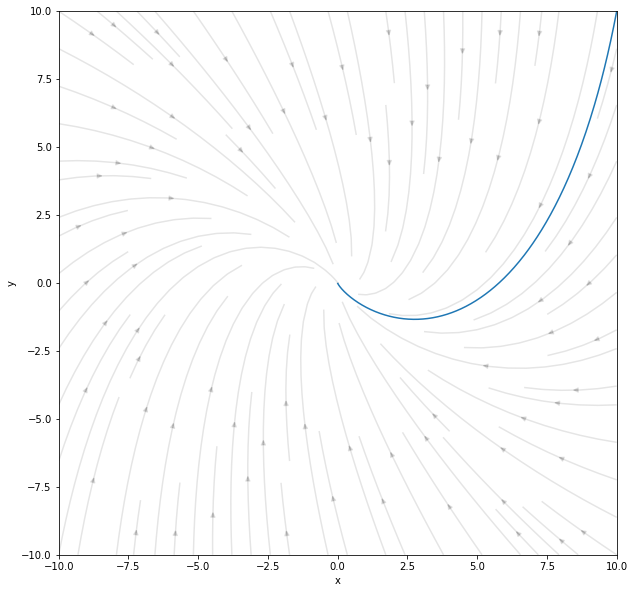

In [17]:
#visualize trajectory
fig, ax = plt.subplots(1,1, figsize=(10,10))

y, x = np.mgrid[-10:10:100j, -10:10:100j]
u,v = right_hand_side((x, y), t=0, A=A_hat)
ax.streamplot(x, y, u, v, color=(0,0,0,0.1))
ax.plot(traj[:,0], traj[:,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
plt.savefig("task2/figures/task2_trajectory_for_10_10")